<a href="https://colab.research.google.com/github/Raidenkyu/hermit-study/blob/master/hermit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
projects_database = pd.read_csv('https://raw.githubusercontent.com/Raidenkyu/hermit-study/master/res/projects.csv?token=AGF4DRZGSOS3FY4427SG3J3AV3EFS', delimiter=";")
diffs_database = pd.read_csv('https://raw.githubusercontent.com/Raidenkyu/hermit-study/master/res/diffs.csv?token=AGF4DR4LNZN5HMGV5OGOBLLAV3D66', delimiter=";")

In [23]:
projects_database

,name,count,url,status,generation,build
0,ColorlibHQ/AdminLTE,1,https://github.com/ColorlibHQ/AdminLTE,discarded,NaN,NaN
1,serverless/serverless,6,https://github.com/serverless/serverless,discarded,NaN,NaN
2,huggingface/transformers,7,https://github.com/huggingface/transformers,discarded,NaN,NaN
3,serverless/serverless,6,https://github.com/serverless/serverless,discarded,NaN,NaN
4,nylas/nylas-mail,1,https://github.com/nylas/nylas-mail,discarded,NaN,NaN
...,...,...,...,...,...,...
106,j3ssie/Osmedeus,1,https://github.com/j3ssie/Osmedeus,NaN,NaN,NaN
107,DevExpress/testcafe,2,https://github.com/DevExpress/testcafe,NaN,NaN,NaN
108,facebook/prophet,1,https://github.com/facebook/prophet,NaN,NaN,NaN
109,open-mmlab/mmdetection,2,https://github.com/open-mmlab/mmdetection,NaN,NaN,NaN


In [24]:
diffs_database

,name,bloatRatio,missedDependencies,balance,ports,risk,entrypoint
0,athena,0.0,0.0,0,NaN,0,70.6
1,cowait,0.0,36.5,3771,NaN,0,100.0
2,vulcan,0.0,0.0,0,NaN,0,70.6
3,newTrackon,93.6,17.0,3635,100.0,0,100.0
4,sherlock,72.5,42.9,877454,NaN,0,100.0
5,k8s-sidecar,92.2,38.0,0,NaN,0,100.0
6,pipenv,21.5,84.7,56081719,NaN,0,100.0
7,RSSHub,27.1,1.1,18432,100.0,0,70.6
8,gitlab-semantic-versioning,4.0,47.4,8988389,NaN,0,100.0
9,findmeaflat,88.8,0.0,0,NaN,0,0.0


,count
status,
accepted,45
discarded,44


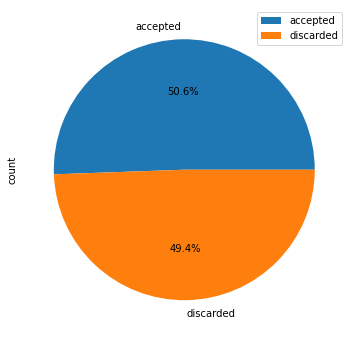

In [25]:
status_count = projects_database.groupby('status').count()
status_count.plot.pie(y='count', figsize=(6, 6), autopct='%1.1f%%')
status_count.drop(columns=['name', 'url', 'generation', 'build'])

,count
generation,
failed,4
successful,41


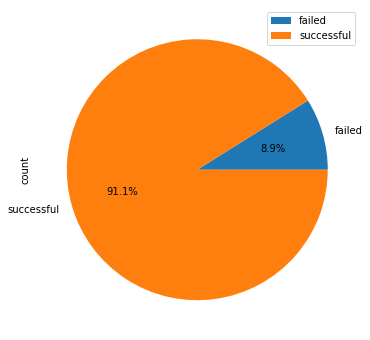

In [26]:
status_count = projects_database.groupby('generation').count()
status_count.plot.pie(y='count', figsize=(6, 6), autopct='%1.1f%%')
status_count.drop(columns=['name', 'url', 'status', 'build'])

,count
build,
failed-build,8
require-extra-steps,1
worked,32


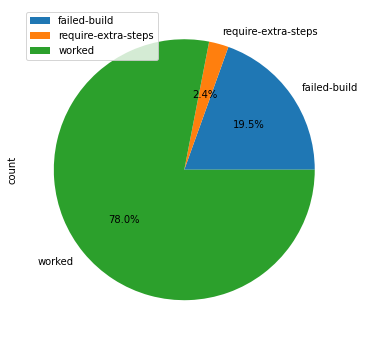

In [27]:
status_count = projects_database.groupby('build').count()
status_count.plot.pie(y='count', figsize=(6, 6), autopct='%1.1f%%')
status_count.drop(columns=['name', 'url', 'generation', 'status'])

In [28]:
print(f"Mean Bloat Ratio: {diffs_database['bloatRatio'].mean()} %")
print(f"Mean Missed Dependencies Ratio: {diffs_database['missedDependencies'].mean()} %")
print(f"Mean Balance: {diffs_database['balance'].mean() / 1000000} MB")
print(f"Mean Ports Detection accuracy: {diffs_database['ports'].dropna().mean()} %")
print(f"Mean Risk Percentage: {diffs_database['risk'].mean()} %")
print(f"Mean Entrypoint similarity: {diffs_database['entrypoint'].mean()} %")

Mean Bloat Ratio: 37.57741935483871 %
Mean Missed Dependencies Ratio: 24.354838709677427 %
Mean Balance: 5.905479064516129 MB
Mean Ports Detection accuracy: 100.0 %
Mean Risk Percentage: 0.0 %
Mean Entrypoint similarity: 80.11290322580643 %
